Myocardial infarction is one of the dangerous diseases. The wide spread of this disease over the past half century has made it one of the most acute problems of modern medicine. The incidence of myocardial infarction (MI) remains high in all countries. This is especially true of the urban population of highly developed countries, exposed to the chronic effects of stress factors, irregular and not always balanced nutrition. In the United States annually, more than million people become ill with myocardial infarction.
Even though the introduction of modern treatment and prophylactic measures has somewhat reduced mortality from heart attacks, it continues to be quite high. Every year in the United States 200-300 thousand people die from acute myocardial infarction before arriving at the hospital. In the United States, every 29 seconds, one person becomes ill with MI, and every minute one patient with MI dies.
The course of the disease in patients with MI is different. MI can occur without complications or with complications that do not worsen the long-term prognosis. At the same time, about half of patients in the acute and subacute periods have complications leading to a worsening of the course of the disease and even death. Even an experienced specialist can not always foresee the development of these complications. In this regard, predicting the complications of myocardial infarction in order to timely carry out the necessary preventive measures is an important task.


#Problems to solve
In general columns 2-112 can be used as input data for prediction. Possible complications
(outputs) are listed in columns 113-124.
There are four possible time moments for complication prediction: on base of the
information known at
1. the time of admission to hospital: all input columns (2-112) except 93, 94, 95, 100, 101,
102, 103, 104, 105 can be used for prediction;
2. the end of the first day (24 hours after admission to the hospital): all input columns (2-
112) except 94, 95, 101, 102, 104, 105 can be used for prediction;
3. the end of the second day (48 hours after admission to the hospital) all input columns (2-
112) except 95, 102, 105 can be used for prediction;
**4. the end of the third day (72 hours after admission to the hospital) all input columns (2-112) can be used for prediction.**

In this project our **target feature** is
119. Myocardial rupture (RAZRIV):

0 – no

1 – yes

Feel free to change any target features and proper thresholds for each model

# data set description:
https://github.com/Talen-520/Applied-data-science/tree/main/myocardial-infarction-complications

# Load Data & Data Processing


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from joblib import Parallel, delayed, parallel_backend
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.model_selection import GridSearchCV
import time
from sklearn.pipeline import make_pipeline

In [2]:
COVER_FILE = '/content/Myocardial infarction complications Database.csv'
df = pd.read_csv(COVER_FILE)
label = list(df.columns)
print(f'number of features {len(label)}')
print(label)

input_label = label
predict_label = label[112:124]

print(f'number of features used for input {len(input_label)}')
print(f'number of features used for predict {len(predict_label)}')

#drop irreleavant predict feature if necessary
#for i in label[112:123]:
#  df.drop(i, axis=1, inplace=True)

df.drop(label[0], axis=1, inplace=True) # drop column ID
label_afterdrop = list(df.columns)

input_label = label_afterdrop[0:111]
print(f'number of features after dropping irreleavant column : {len(label_afterdrop)}')
print(f'number of features after dropping irreleavant column : {label_afterdrop}')
print(f'number of features input label : {input_label}')

#what we need to predict
target_feature = label[118]
print(f'target features that cause death: {target_feature}')



number of features 124
['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 

### Imputation for missing value

In [3]:
#determine number missing value
missing_values = df.isnull().sum()
print(f' total missing value before mean imputation: {sum(missing_values)}')

#after mean imputation, fill missing value with column mean
df = df.fillna(df.mean())
#what we filled
print(df)

#result
#determine number missing value
missing_values = df.isnull().sum()
print(f' total missing value after mean imputation: {sum(missing_values)}')

 total missing value before mean imputation: 15974
       AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0     77.0    1       2.0   1.000000   1.000000  2.000000     0.375  3.0   
1     55.0    1       1.0   0.000000   0.000000  0.000000     0.000  0.0   
2     52.0    1       0.0   0.000000   0.000000  2.000000     0.375  2.0   
3     68.0    0       0.0   0.000000   0.000000  2.000000     0.375  2.0   
4     60.0    1       0.0   0.000000   0.000000  2.000000     0.375  3.0   
...    ...  ...       ...        ...        ...       ...       ...  ...   
1695  77.0    0       0.0   4.000000   2.000000  1.000000     0.375  2.0   
1696  70.0    0       0.0   6.000000   2.000000  1.000000     0.375  2.0   
1697  55.0    1       3.0   6.000000   2.000000  2.000000     0.375  0.0   
1698  79.0    0       2.0   2.000000   2.000000  1.000000     0.375  2.0   
1699  63.0    1       2.0   2.316186   1.205286  1.160703     0.375  2.0   

      SIM_GIPERT  DLIT_AG  ...  JELU

In [4]:
df.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,0.375,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,0.375,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,0.375,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,0.375,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


Split data into train/test set with 80%/20%


In [5]:

df = df.sample(frac=1).reset_index(drop=True)
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
num_rows, num_columns = df.shape
# top 80% rows are selected # for training
df_train = df.head(int(num_rows*0.8))
# bottom 20% values are selected
# for testing/validation
df_test = df.tail(int(num_rows*0.2))

# Decision Tree model

In [6]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3,modify depth to improve performance
clf = tree.DecisionTreeClassifier(max_depth=3)
# choose the columns you want to train on # these are the features for the model
cols = input_label
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train[target_feature])



# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on # training data set
train_accuracy = metrics.accuracy_score(
df_train[target_feature], train_predictions )
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test[target_feature], test_predictions )

print(f'train_accuracy is: {train_accuracy}')
print(f'test_accuracy is: {test_accuracy}')


train_accuracy is: 0.9705882352941176
test_accuracy is: 0.9676470588235294


determine depth of our decision tree model, we need to do hyperparameter turning, by make a plot, we can observe the model performance


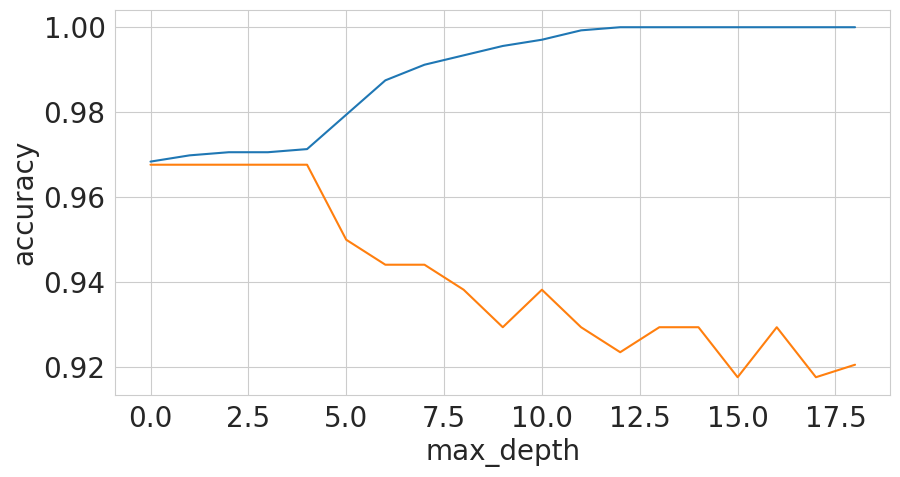

In [7]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn # for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed # inside the notebook
%matplotlib inline

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = []
test_accuracies = []

best_depth = 0
best_metrics = 0
# iterate over a few depth values,f
for depth in range(1, 20):
# init the model
  clf = tree.DecisionTreeClassifier(max_depth=depth)
# columns/features for training
# note that, this can be done outside # the loop
  cols = input_label
  clf.fit(df_train[cols], df_train[target_feature])
# create training & test predictions
  train_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])
  # calculate training & test accuracies
  train_accuracy = metrics.accuracy_score(df_train[target_feature], train_predictions
  )
  test_accuracy = metrics.accuracy_score(
  df_test[target_feature], test_predictions )
  # append accuracies
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
  if best_metrics > test_accuracy:
    best_metrics = test_accuracy
    best_depth = depth

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
#plt.legend(loc="upper left", prop={'size': 15})
#plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

### Overfitting
We see that the best score for test data is obtained when max_depth has a value of As we keep increasing the value of this parameter, test accuracy remains the
same or gets worse, but the training accuracy keeps increasing. It means that our simple decision tree model keeps learning about the training data better and better with an increase in max_depth, but the performance on test data does not improve at all.


Since this is muti-class classification problem, we do k-folder split


### k-fold cross validation


In [8]:
#k-fold cross validation template change only thing need to be changed is df which is your data frame

number_of_folder = 5

import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
  # Training data is in a CSV file called train.csv
  #df = pd.read_csv("train.csv")
  # we create a new column called kfold and fill it with -1
  df["kfold"] = -1
  # the next step is to randomize the rows of the data
  df = df.sample(frac=1).reset_index(drop=True)
  # initiate the kfold class from model_selection module
  kf = model_selection.KFold(n_splits=number_of_folder)
  # fill the new kfold column
  for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold
  # save the new csv with kfold column
  df.to_csv("train_folds.csv", index=False)

In [9]:
#change target column from 113-124
counts = df[target_feature].value_counts()
print(counts)

0    1646
1      54
Name: RAZRIV, dtype: int64


Text(0, 0.5, 'count')

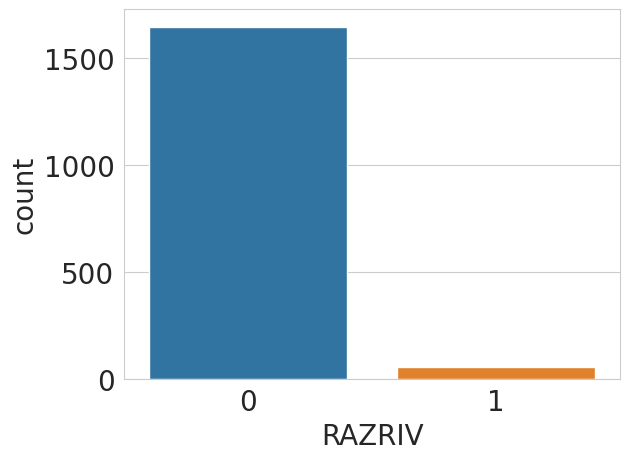

In [10]:
b = sns.countplot(x=target_feature, data=df)
b.set_xlabel(target_feature, fontsize=20)
b.set_ylabel("count", fontsize=20)

we can say that the case is very much skewed,some class have a lot of samples, and some don’t have that many. If we do a simple k-fold, we won’t have an equal distribution of targets in every fold. Thus, we choose stratified k-fold in this case

In [11]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
  # Training data is in a csv file called train.csv
  #df = pd.read_csv("train.csv")
  # we create a new column called kfold and fill it with -1
  df["kfold"] = -1
  # the next step is to randomize the rows of the data
  df = df.sample(frac=1).reset_index(drop=True)
  # fetch targets
  y = df["RAZRIV"].values
  # initiate the kfold class from model_selection module
  kf = model_selection.StratifiedKFold(n_splits=number_of_folder)
  # fill the new kfold column
  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): df.loc[v_, 'kfold'] = f
  # save the new csv with kfold column
  df.to_csv("train_folds.csv", index=False)

In [ ]:
#b = sns.countplot(x='LET_IS', data=df)
#b.set_xlabel("LET_IS", fontsize=20)
#b.set_ylabel("count", fontsize=20)

https://stackoverflow.com/questions/39577408/which-averaging-should-be-used-when-computing-the-roc-auc-on-imbalanced-data-set

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold: 0, Accuracy: 0.9705882352941176
Fold: 0, f1: 0.9561018437225636
Fold: 0, precision: 0.9420415224913495
Fold: 0, AUC: 0.5
Confusion Matrix:
 [[330   0]
 [ 10   0]]
Fold: 1, Accuracy: 0.9676470588235294
Fold: 1, f1: 0.9517365690670886
Fold: 1, precision: 0.9363408304498271
Fold: 1, AUC: 0.5
Confusion Matrix:
 [[329   0]
 [ 11   0]]
Fold: 2, Accuracy: 0.9676470588235294
Fold: 2, f1: 0.9517365690670886
Fold: 2, precision: 0.9363408304498271
Fold: 2, AUC: 0.5
Confusion Matrix:
 [[329   0]
 [ 11   0]]
Fold: 3, Accuracy: 0.9647058823529412
Fold: 3, f1: 0.9502641775272983
Fold: 3, precision: 0.9362484816935623
Fold: 3, AUC: 0.49848024316109424
Confusion Matrix:
 [[328   1]
 [ 11   0]]
Fold: 4, Accuracy: 0.9676470588235294
Fold: 4, f1: 0.9517365690670886
Fold: 4, precision: 0.9363408304498271
Fold: 4, AUC: 0.5
Confusion Matrix:
 [[329   0]
 [ 11   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


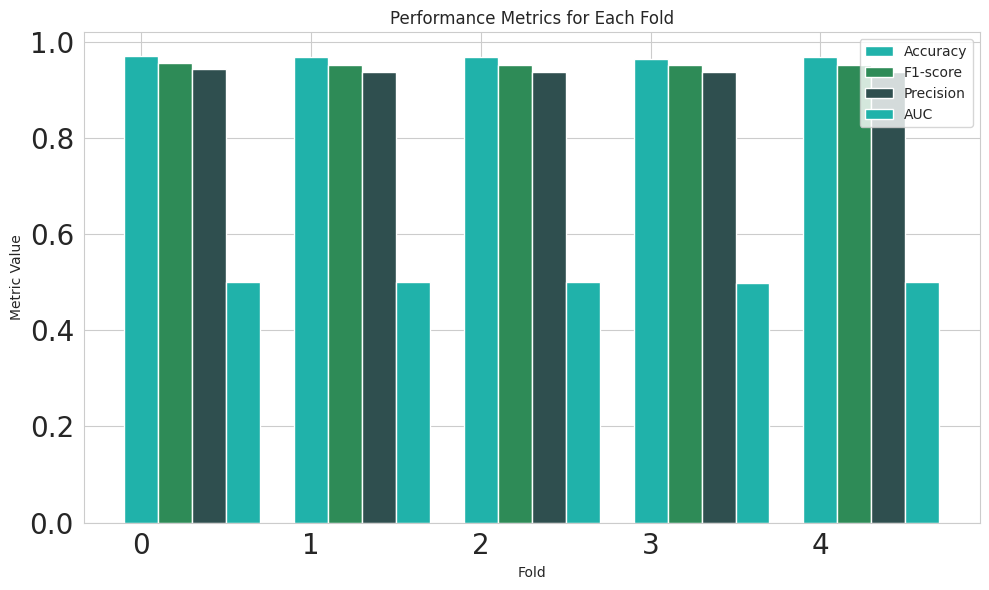

In [12]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_list = []
f1_list = []
precision_list = []
AUC_list = []
fold_labels = []

for fold in range(number_of_folder):
    # Training and validation sets
    train_df = df[df.kfold != fold].reset_index(drop=True)
    valid_df = df[df.kfold == fold].reset_index(drop=True)

    # X and y for training and validation
    x_train = train_df[input_label]
    y_train = train_df[target_feature]
    x_valid = valid_df[input_label]
    y_valid = valid_df[target_feature]

    # Initialize the model (you can choose and tune your model)
    model = tree.DecisionTreeClassifier(max_depth=3)

    # Fit the model
    model.fit(x_train, y_train)

    # Predict on validation set
    valid_preds = model.predict(x_valid)

    # Calculate and print the accuracy
    accuracy = metrics.accuracy_score(y_valid, valid_preds)
    accuracy_list.append(accuracy)
    f1 = metrics.f1_score(y_valid, valid_preds, average='weighted')
    f1_list.append(f1)
    precision = metrics.precision_score(y_valid, valid_preds, average='weighted')
    precision_list.append(precision)
    #binary class AUC
    AUC = metrics.roc_auc_score(y_valid, valid_preds, average='weighted')
    #muti class
    #AUC = metrics.roc_auc_score(y_valid, model.predict_proba(x_valid), average='weighted', multi_class='ovr')
    AUC_list.append(AUC)
    print(f"Fold: {fold}, Accuracy: {accuracy}")
    print(f"Fold: {fold}, f1: {f1}")
    print(f"Fold: {fold}, precision: {precision}")
    print(f"Fold: {fold}, AUC: {AUC}")
    cm = metrics.confusion_matrix(y_valid, valid_preds)
    print("Confusion Matrix:\n", cm)
    fold_labels.append(f"Folder {fold + 1}: {accuracy:.2f}")

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(np.arange(len(fold_labels)), accuracy_list, width=0.2, label='Accuracy',color = 'lightseagreen')
plt.bar(np.arange(len(fold_labels)) + 0.2, f1_list, width=0.2, label='F1-score',color = 'seagreen')
plt.bar(np.arange(len(fold_labels)) + 0.4, precision_list, width=0.2, label='Precision',color = 'darkslategray')
plt.bar(np.arange(len(fold_labels)) + 0.6, AUC_list, width=0.2, label='AUC',color = 'lightseagreen')

plt.xlabel("Fold")
plt.ylabel("Metric Value")
#plt.xticks(np.arange(len(fold_labels)) + 0.3, fold_labels, rotation=45)
plt.legend()
plt.title("Performance Metrics for Each Fold")
plt.tight_layout()
plt.show()




These metrics caculate average of TP AND TN, We need to improve the model's ability to correctly recognize positive cases, total postive case is 11 but 0 regonized, so we need to do futher improvement

# Feature Selection

In [13]:
feature_importances = model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

# Select the top N most important features
N = 10  # You can adjust N as needed
selected_features = df.columns[sorted_indices][:N]

# Print the selected features
print(f'Top {N} selected features based on feature importance:')
print(selected_features)


Top 10 selected features based on feature importance:
Index(['AST_BLOOD', 'lat_im', 'R_AB_3_n', 'S_AD_KBRIG', 'np_01', 'S_AD_ORIT',
       'TRENT_S_n', 'K_SH_POST', 'zab_leg_02', 'zab_leg_03'],
      dtype='object')


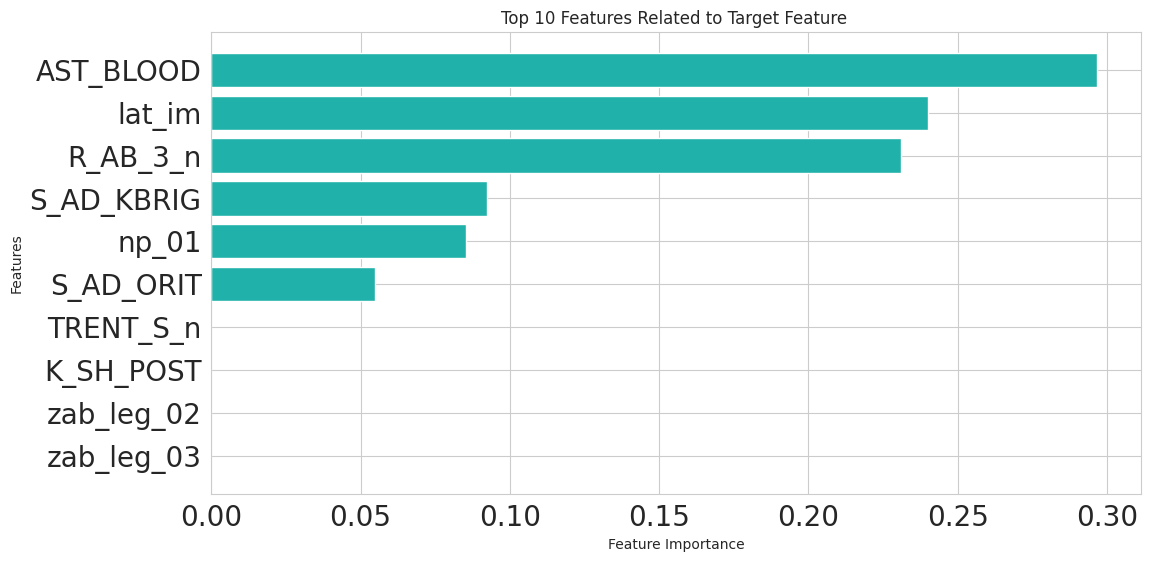

In [15]:
top_features_indices = sorted_indices[:10]  # Select the top 20 features
top_features_names = df.columns[top_features_indices]

plt.figure(figsize=(12, 6))
plt.barh(top_features_names, feature_importances[top_features_indices],color = 'lightseagreen')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features Related to Target Feature ')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()




Use most releavent features to train model again

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Separate your dataset into features (X) and the target variable (y)
X = df[selected_features[:6]] # select top   features
y = df[target_feature]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23655842)

# Initialize and train your model with class weights to handle imbalance
# Set class_weight='balanced' to automatically adjust for class imbalance
model = RandomForestClassifier(random_state=23655842, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification report and ROC AUC
classification_rep = classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(classification_rep)
print(f"ROC AUC Score: {roc_auc}")
print(cm)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       327
           1       0.00      0.00      0.00        13

    accuracy                           0.95       340
   macro avg       0.48      0.49      0.49       340
weighted avg       0.92      0.95      0.94       340

ROC AUC Score: 0.4938837920489297
[[323   4]
 [ 13   0]]


Look at result of accuracy metrics of our model, the output is good arround 90%
but accuracy metrics is meanless for imbalanced dataset

we will see that the dataset is skewed, i.e., the number of samples in one class outnumber the number of samples in other class by a lot. In these kinds of cases

If we talk about classification problems, the most common metrics used are:
- Accuracy
- Precision
- Recall  
- F1 score  
- Area under the ROC (Receiver Operating Characteristic) curve or simply
AUC  
- Log loss
- Precision at k  
- Average precision at k  
- Mean average precision at k  

When it comes to regression, the most commonly used evaluation metrics are:
- Mean absolute error (MAE) #time series prefered
- Mean squared error (MSE) #time series prefered
- Root mean squared error (RMSE) #time series
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE) # time series
- R2

Precision: This metric is crucial in medical diagnostics as it measures the proportion of true positives (correctly identified Myocardial ruptures) out of all positive predictions. High precision minimizes false positives.

F1 Score: The F1 score is the harmonic mean of precision and recall. It's a useful metric when you need to balance precision and recall, which is often the case in medical diagnostics.

AUC-ROC (Area Under the Receiver Operating Characteristics Curve): This metric is useful for evaluating the model's ability to distinguish between the two classes across different thresholds. It's particularly useful when you have an imbalanced dataset.

![table](https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

In [165]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
file = tf.keras.utils
raw_df = pd.read_csv('/content/Myocardial infarction complications Database.csv')
raw_df.head()



,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
raw_df[['RAZRIV']].describe()

,RAZRIV
count,1700.000000
mean,0.031765
std,0.175425
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [167]:
neg, pos = np.bincount(raw_df['RAZRIV'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))


Examples:
    Total: 1700
    Positive: 54 (3.18% of total)



#Data processing and cleaning

In [168]:
#Clean, split and normalize the data
#The raw data has a few issues. First the Time and Amount columns are too variable to use directly. Drop the Time column (since it's not clear what it means) and take the log of the Amount column to reduce its range.

cleaned_df = raw_df.copy()

#drop  column major data is empty doesnt meanful
#IBS_NASL 95.76% missing

cleaned_df.pop('IBS_NASL')
cleaned_df.pop('ID')

cleaned_df.pop('FIBR_PREDS')
cleaned_df.pop('PREDS_TAH')
cleaned_df.pop('JELUD_TAH')
cleaned_df.pop('FIBR_JELUD')
cleaned_df.pop('A_V_BLOK')
cleaned_df.pop('OTEK_LANC')
cleaned_df.pop('DRESSLER')
cleaned_df.pop('ZSN')
cleaned_df.pop('REC_IM')
cleaned_df.pop('P_IM_STEN')
cleaned_df.pop('LET_IS')

#fill empty cell with mean
cleaned_df.fillna(cleaned_df.mean(), inplace=True)


# The `Amount` column covers a huge range. Convert to log-space.
#eps = 0.001 # 0 => 0.1¢
#cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount')+eps)


# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('RAZRIV'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('RAZRIV'))
test_labels = np.array(test_df.pop('RAZRIV'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

We check whether the distribution of the classes in the three sets is about the same or not.



In [169]:
print(f'Average RAZRIV probability in training set:   {train_labels.mean():.4f}')
print(f'Average RAZRIV probability in validation set: {val_labels.mean():.4f}')
print(f'Average RAZRIV probability in test set:       {test_labels.mean():.4f}')



Average RAZRIV probability in training set:   0.0331
Average RAZRIV probability in validation set: 0.0331
Average RAZRIV probability in test set:       0.0265


Given the small number of positive labels, this seems about right.

Normalize the input features using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1.



In [170]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (1088,)
Validation labels shape: (272,)
Test labels shape: (340,)
Training features shape: (1088, 110)
Validation features shape: (272, 110)
Test features shape: (340, 110)


In [171]:


column_headers = list(cleaned_df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_

select any two columns that you think they are related with pos and neg case of target feature

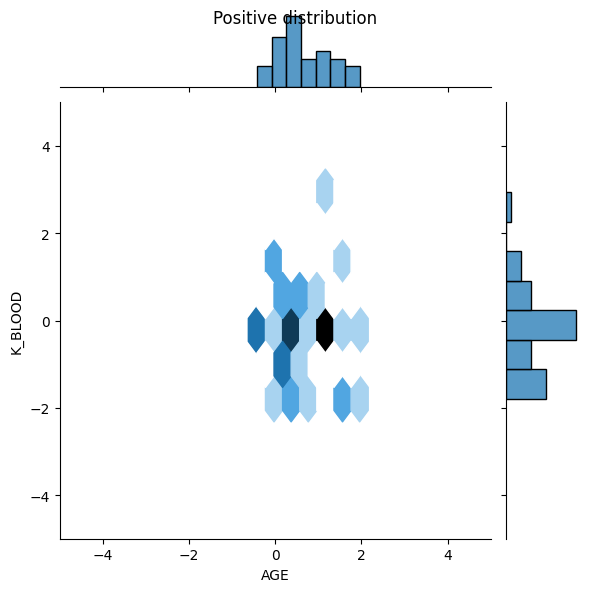

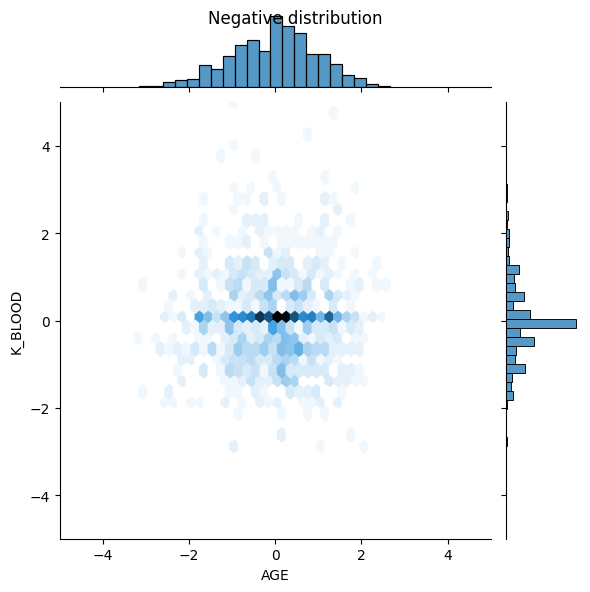

In [172]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(x=pos_df['AGE'], y=pos_df['K_BLOOD'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['AGE'], y=neg_df['K_BLOOD'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

#define metrics function

once metrics function is define we evaluate model all metrics  at once

follow DRY

In [173]:
METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          128, activation='relu',
          input_shape=(train_features.shape[-1],)),
      #keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model


In [174]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', #set metrics you do care most , another choose from val_prc and  val_precision
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)
model = make_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 128)               14208     
                                                                 
 dense_47 (Dense)            (None, 1)                 129       
                                                                 
Total params: 14337 (56.00 KB)
Trainable params: 14337 (56.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Test run the model:



In [175]:
model.predict(train_features)


34/34 [==============================] - 0s 2ms/step


array([[0.40779158],
       [0.33959037],
       [0.3626029 ],
       ...,
       [0.31258446],
       [0.65480214],
       [0.6616583 ]], dtype=float32)

# Set the correct initial bias.

These initial guesses are not great. You know the dataset is imbalanced. Set the output layer's bias to reflect that, see A Recipe for Training Neural Networks: "init well". This can help with initial convergence.




Set that as the initial bias, and the model will give much more reasonable initial guesses.


In [176]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5348


In [177]:
initial_bias = np.log([pos/neg])
initial_bias

array([-3.41711933])

Average RAZRIV probability in training set:   0.0322
Average RAZRIV probability in validation set: 0.0294
Average RAZRIV probability in test set:       0.0324

compare this output with what we get in previous step, now the initial guess is reasonable

In [178]:
model = make_model(output_bias=initial_bias)
model.predict(train_features)

34/34 [==============================] - 1s 1ms/step


array([[0.04341061],
       [0.02246667],
       [0.06076345],
       ...,
       [0.13738076],
       [0.06497929],
       [0.09703264]], dtype=float32)

In [179]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.1680


before optimization:
loss: 0.3308
after optimization:
Loss: 0.1620


This initial loss is about 2 times less than it would have been with naive initialization.

This way the model doesn't need to spend the first few epochs just learning that positive examples are unlikely. It also makes it easier to read plots of the loss during training.


Checkpoint the initial weights

To make the various training runs more comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training:

In [180]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

Confirm that the bias fix helps

Before moving on, confirm quick that the careful bias initialization actually helped.

Train the model for 20 epochs, with and without this careful initialization, and compare the losses:

In [181]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)

In [182]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)

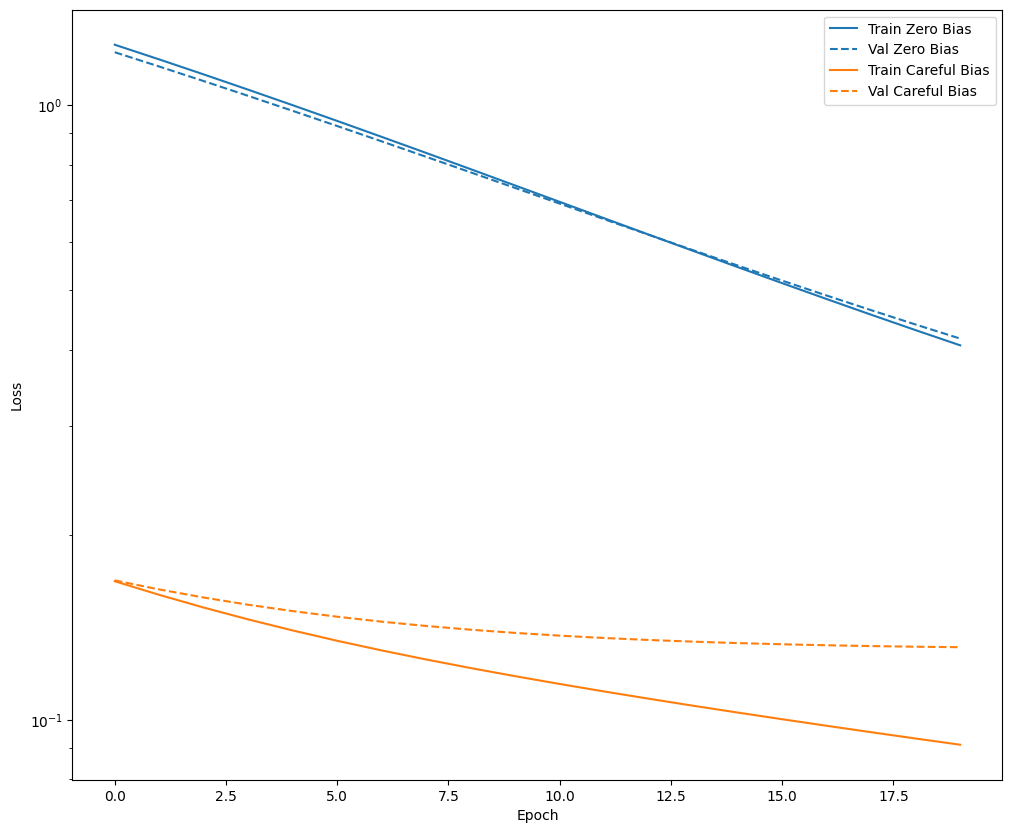

In [183]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

The above figure makes it clear: In terms of validation loss, on this problem, this careful initialization gives a clear advantage.


#Train the model

In [184]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.1680 - cross entropy: 0.1606 - Brier score: 0.0363 - tp: 1.0000 - fp: 3.0000 - tn: 1312.0000 - fn: 44.0000 - accuracy: 0.9654 - precision: 0.2500 - recall: 0.0222 - auc: 0.6740 - prc: 0.0844 - val_loss: 0.1685 - val_cross entropy: 0.1685 - val_Brier score: 0.0375 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 263.0000 - val_fn: 9.0000 - val_accuracy: 0.9669 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6462 - val_prc: 0.0675
Epoch 2/100
1/1 [==============================] - 0s 71ms/step - loss: 0.1596 - cross entropy: 0.1596 - Brier score: 0.0351 - tp: 1.0000 - fp: 1.0000 - tn: 1051.0000 - fn: 35.0000 - accuracy: 0.9669 - precision: 0.5000 - recall: 0.0278 - auc: 0.6861 - prc: 0.1018 - val_loss: 0.1629 - val_cross entropy: 0.1629 - val_Brier score: 0.0363 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 263.0000 - val_fn: 9.0000 - val_accuracy: 0.9669 - val_precision: 0.0000e+00 - val_r

#Check training history

In [185]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

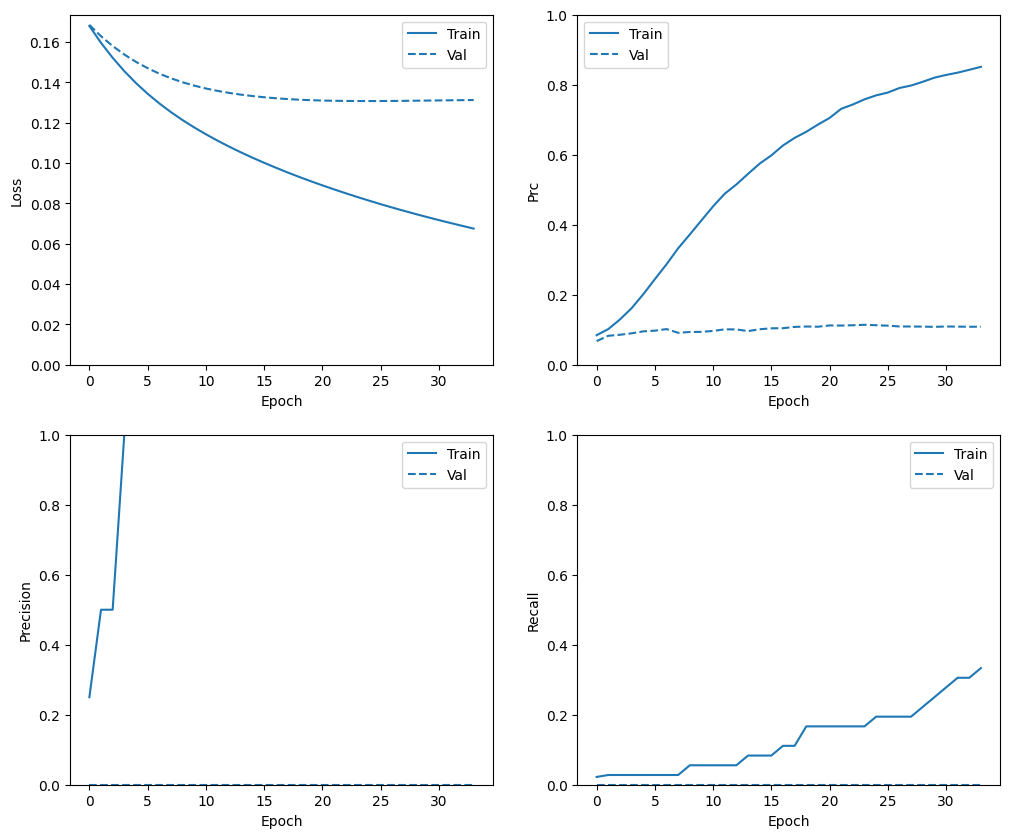

In [186]:
plot_metrics(baseline_history)


In [187]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

1/1 [==============================] - 0s 20ms/step


In [252]:
def plot_cm(labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('patient no Myocardial rupture Detected (True Negatives): ', cm[0][0])
  print('patient no Myocardial rupture Incorrectly Detected (False Positives): ', cm[0][1])
  print('patient with Myocardial rupture Missed (False Negatives): ', cm[1][0])
  print('patient with Myocardial rupture Detected (True Positives): ', cm[1][1])
  print('patient with Myocardial rupture(TN+FN): ', np.sum(cm[1]))

loss :  0.12928012013435364
cross entropy :  0.12928012013435364
Brier score :  0.028201568871736526
tp :  0.0
fp :  0.0
tn :  331.0
fn :  9.0
accuracy :  0.9735293984413147
precision :  0.0
recall :  0.0
auc :  0.6320913434028625
prc :  0.036134980618953705

patient no Myocardial rupture Detected (True Negatives):  331
patient no Myocardial rupture Incorrectly Detected (False Positives):  0
patient with Myocardial rupture Missed (False Negatives):  9
patient with Myocardial rupture Detected (True Positives):  0
patient with Myocardial rupture(TN+FN):  9


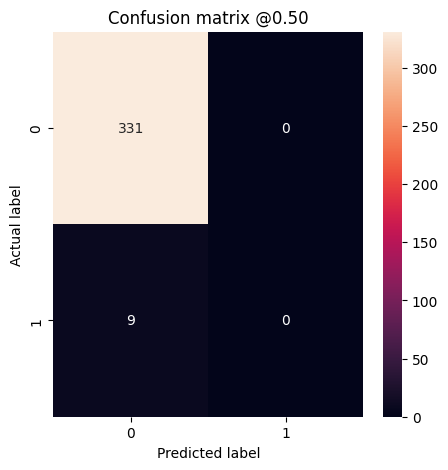

In [189]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

Precision is the percentage of predicted positives that were correctly classified

# TP / TP + FP
Recall is the percentage of actual positives that were correctly classified

# TP/ TP+FN

If the model had predicted everything perfectly (impossible with true randomness), this would be a diagonal matrix where values off the main diagonal, indicating incorrect predictions, would be zero. In this case, the matrix shows that you have relatively few false positives, meaning that there were relatively few legitimate transactions that were incorrectly flagged.

# Changing the threshold

The default threshold of
 corresponds to equal costs of false negatives and false positives. In the case of fraud detection, however, you would likely associate higher costs to false negatives than to false positives. This trade off may be preferable because false negatives would allow fraudulent transactions to go through, whereas false positives may cause an email to be sent to a customer to ask them to verify their card activity.

By decreasing the threshold, we attribute higher cost to false negatives, thereby increasing missed transactions at the price of more false positives. We test thresholds at 10% and at 1%

patient no Myocardial rupture Detected (True Negatives):  331
patient no Myocardial rupture Incorrectly Detected (False Positives):  0
patient with Myocardial rupture Missed (False Negatives):  9
patient with Myocardial rupture Detected (True Positives):  0
patient with Myocardial rupture(TN+FN):  9
patient no Myocardial rupture Detected (True Negatives):  68
patient no Myocardial rupture Incorrectly Detected (False Positives):  263
patient with Myocardial rupture Missed (False Negatives):  0
patient with Myocardial rupture Detected (True Positives):  9
patient with Myocardial rupture(TN+FN):  9


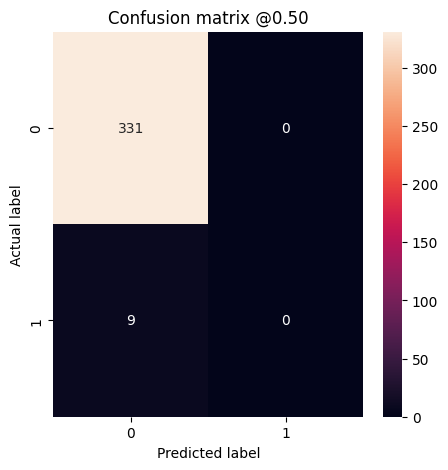

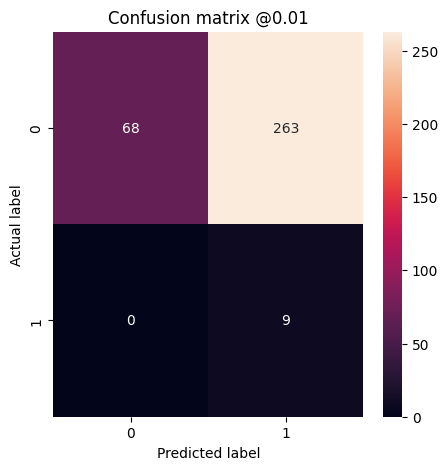

In [190]:
plot_cm(test_labels, test_predictions_baseline, threshold=0.5)
plot_cm(test_labels, test_predictions_baseline, threshold=0.01)

#Plot the ROC

Now plot the ROC. This plot is useful because it shows, at a glance, the range of performance the model can reach by tuning the output threshold over its full range (0 to 1). So each point corresponds to a single value of the threshold.

In [191]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

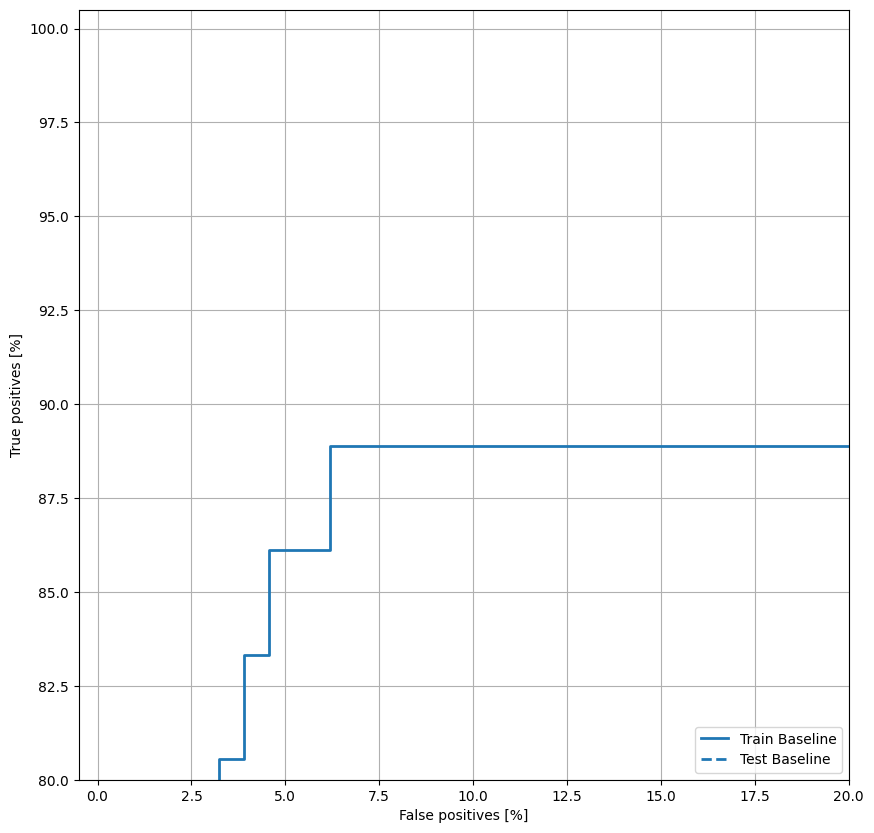

In [192]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

Plot the PRC

Now plot the AUPRC. Area under the interpolated precision-recall curve, obtained by plotting (recall, precision) points for different values of the classification threshold. Depending on how it's calculated, PR AUC may be equivalent to the average precision of the model.

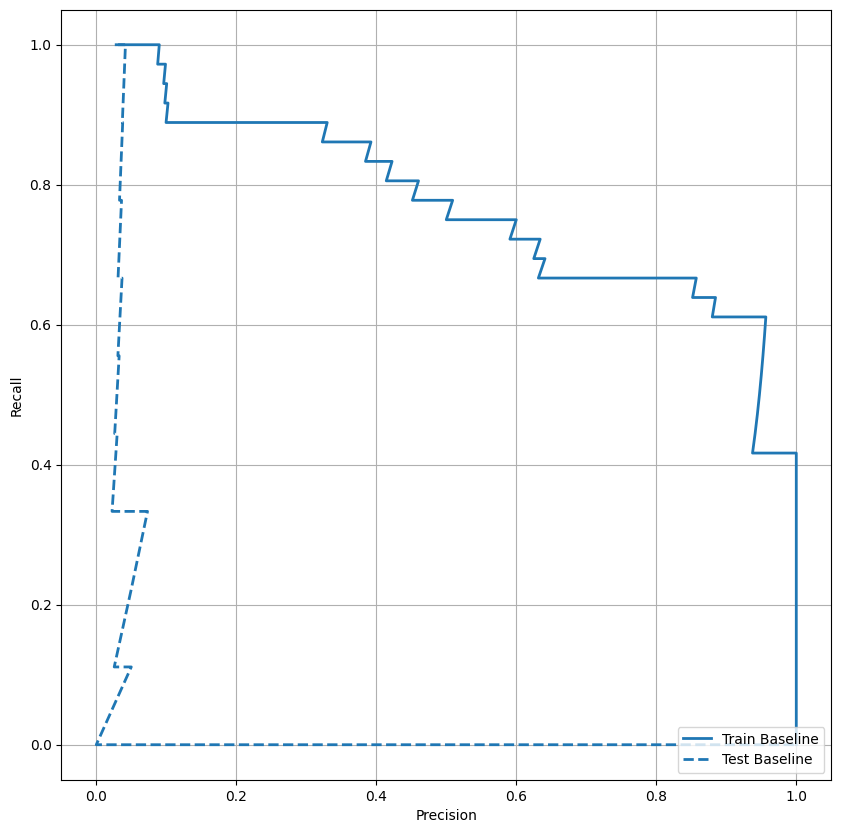

In [193]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

It looks like the precision is relatively high, but the recall and the area under the ROC curve (AUC) aren't as high as you might like. Classifiers often face challenges when trying to maximize both precision and recall, which is especially true when working with imbalanced datasets. It is important to consider the costs of different types of errors in the context of the problem you care about. In this example, patient with Myocardial rupture Missed (False Negatives) have a result delay treament causing more serious issue, while a patient no Myocardial rupture Incorrectly Detected (False Positives) may waste medical resource and decrease patient happiness due to unnecessary concern

#Class weights

Calculate class weights

The goal is to identify fraudulent transactions, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class. Note, however, that this does not increase in any way the amount of information of your dataset. In the end, using class weights is more or less equivalent to changing the output bias or to changing the threshold. Let's see how it works out.

In [194]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 15.74


Train a model with class weights

Now try re-training and evaluating the model with class weights to see how that affects the predictions.



In [195]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.2115 - cross entropy: 0.1588 - Brier score: 0.0351 - tp: 1.0000 - fp: 2.0000 - tn: 1381.0000 - fn: 44.0000 - accuracy: 0.9678 - precision: 0.3333 - recall: 0.0222 - auc: 0.6303 - prc: 0.0767 - val_loss: 0.1794 - val_cross entropy: 0.1794 - val_Brier score: 0.0404 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 262.0000 - val_fn: 9.0000 - val_accuracy: 0.9632 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6384 - val_prc: 0.0660
Epoch 2/100
1/1 [==============================] - 0s 65ms/step - loss: 1.1272 - cross entropy: 0.1687 - Brier score: 0.0374 - tp: 1.0000 - fp: 3.0000 - tn: 1049.0000 - fn: 35.0000 - accuracy: 0.9651 - precision: 0.2500 - recall: 0.0278 - auc: 0.6908 - prc: 0.1065 - val_loss: 0.1847 - val_cross entropy: 0.1847 - val_Brier score: 0.0421 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 262.0000 - val_fn: 9.0000 - val_accuracy: 0.9632 - val_precision: 0.0000e+00 - val_recall: 0

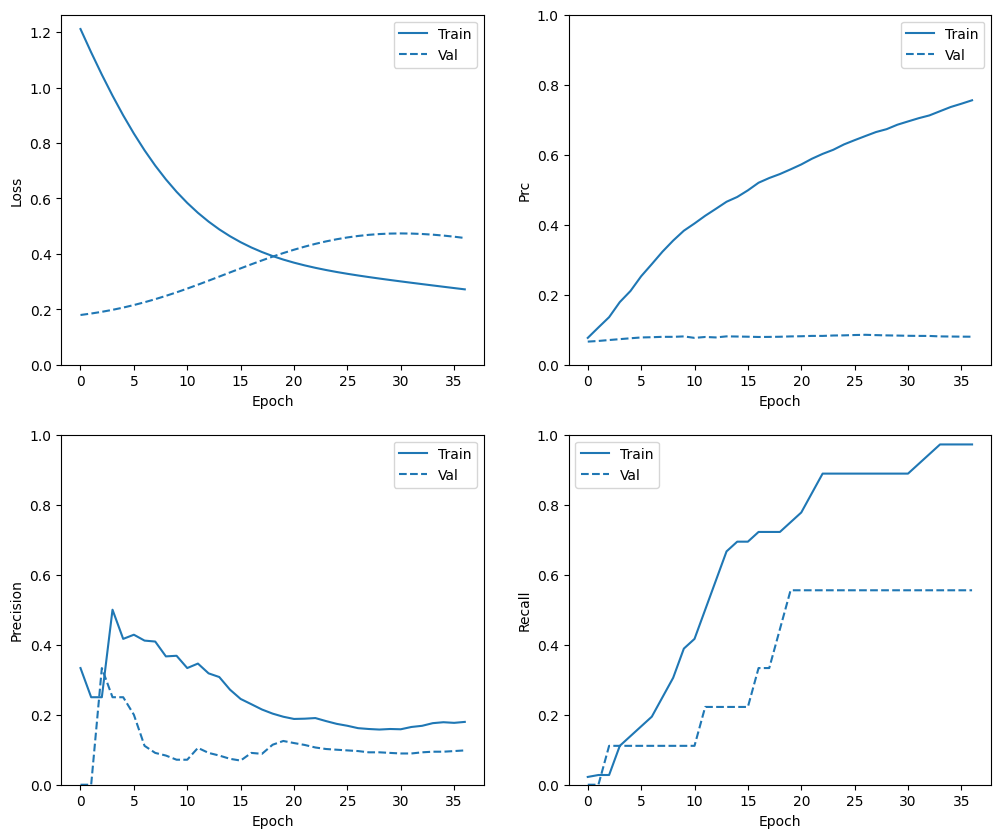

In [196]:
plot_metrics(weighted_history)

1/1 [==============================] - 0s 27ms/step
loss :  0.42987093329429626
cross entropy :  0.42987093329429626
Brier score :  0.13702677190303802
tp :  4.0
fp :  59.0
tn :  272.0
fn :  5.0
accuracy :  0.8117647171020508
precision :  0.0634920671582222
recall :  0.4444444477558136
auc :  0.6814367175102234
prc :  0.040474988520145416

patient no Myocardial rupture Detected (True Negatives):  272
patient no Myocardial rupture Incorrectly Detected (False Positives):  59
patient with Myocardial rupture Missed (False Negatives):  5
patient with Myocardial rupture Detected (True Positives):  4
patient with Myocardial rupture(TN+FN):  9
patient no Myocardial rupture Detected (True Negatives):  151
patient no Myocardial rupture Incorrectly Detected (False Positives):  180
patient with Myocardial rupture Missed (False Negatives):  1
patient with Myocardial rupture Detected (True Positives):  8
patient with Myocardial rupture(TN+FN):  9


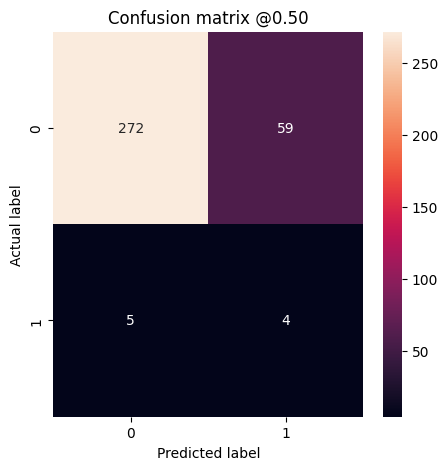

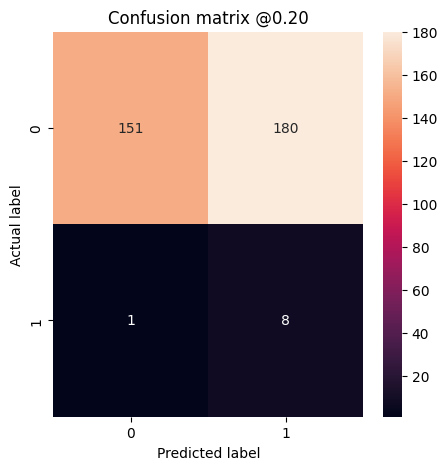

In [200]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()
plot_cm(test_labels, test_predictions_weighted)
plot_cm(test_labels, test_predictions_weighted,threshold=0.2)

Plot the ROC

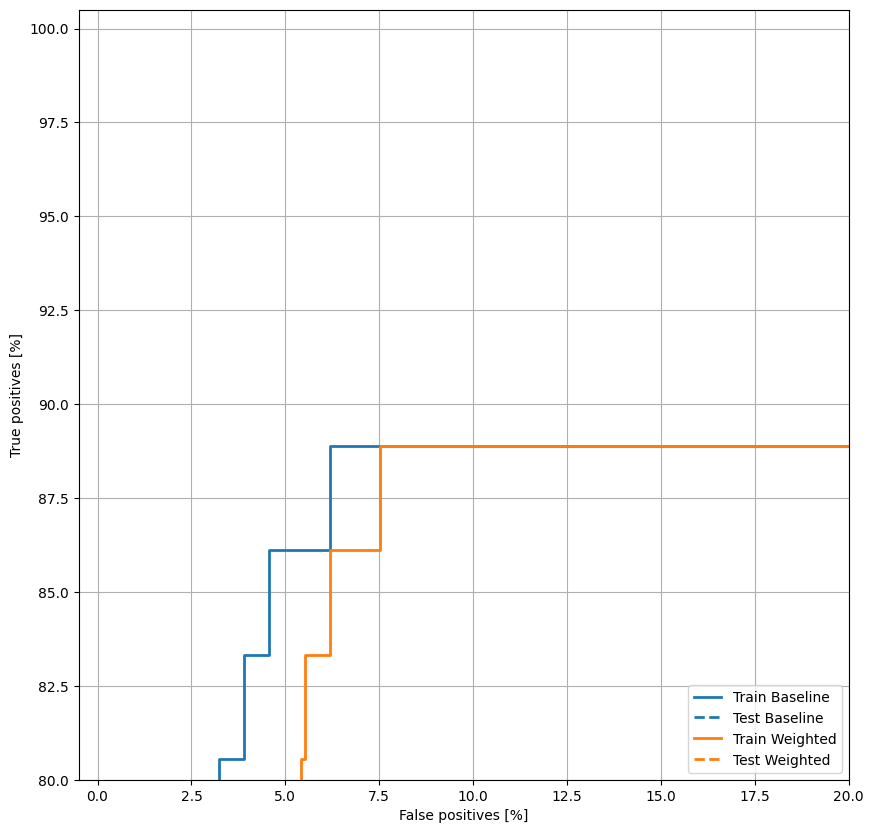

In [201]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

PRC

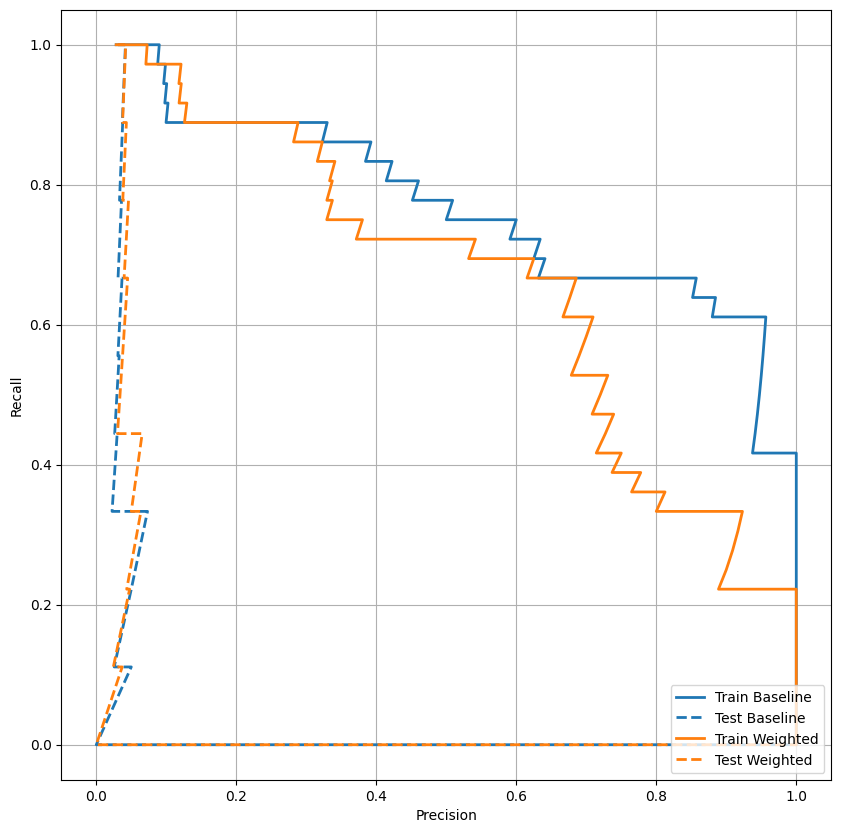

In [202]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

#Oversampling

Oversample the minority class



In [203]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(1052, 110)

In [204]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(2104, 110)

Using tf.data

If you're using tf.data the easiest way to produce balanced examples is to start with a positive and a negative dataset, and merge them. See the tf.data guide for more examples.

In [205]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

Each dataset provides (feature, label) pairs:



In [206]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 0.36929139 -1.32718549 -0.65077493 -0.96380164 -1.17030878  1.03953399
  1.467243   -0.19383588  1.27354656 -0.30476048 -0.16707551 -0.10106214
 -0.11102809 -0.15478192 -0.15139336 -0.03052973 -0.03112554 -0.03069167
 -0.04329718 -0.09694795 -0.03051133 -0.05320892 -0.09631427 -0.05289626
 -0.38549809 -0.14464053 -0.06857477 -0.32121864 -0.27730457 -0.14766216
 -0.06830899 -0.11470592  1.08194772  0.68679936  1.22368934  1.58582716
 -0.2536293  -0.16381089 -0.28181024 -0.08079864 -0.08079864 -0.09683028
  1.45393397  1.32442224 -0.7390484  -0.38887206 -0.16839058  0.75321992
 -0.28080214 -0.13015659 -0.03231117 -0.57053526 -0.18019149 -0.20722505
 -0.07331017 -0.41723366 -0.22600366 -0.2239873  -0.16609428 -0.06374294
 -0.03331724 -0.03331724 -0.03331724 -0.15714784 -0.0644912  -0.27789876
 -0.13591861 -0.27413595 -0.05862575 -0.10108547 -0.16079715 -0.12916336
 -0.22580346 -0.09668672 -0.09677226 -0.21341435 -0.05279081 -0.06830964
 -0.06101577 -0.04304123  1.34372093 -0.

Merge the two together using tf.data.Dataset.sample_from_datasets:



In [207]:
resampled_ds = tf.data.Dataset.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [208]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.49853515625


In [209]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

2.0

Train on the oversampled data

Now try training the model with the resampled data set instead of using class weights to see how these methods compare.



In [210]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1]
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2)

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
2/2 [==============================] - 2s 701ms/step - loss: 0.7687 - cross entropy: 0.7428 - Brier score: 0.2665 - tp: 2054.0000 - fp: 1918.0000 - tn: 459.0000 - fn: 5.0000 - accuracy: 0.5665 - precision: 0.5171 - recall: 0.9976 - auc: 0.7058 - prc: 0.6579 - val_loss: 1.1792 - val_cross entropy: 1.1792 - val_Brier score: 0.4526 - val_tp: 9.0000 - val_fp: 235.0000 - val_tn: 28.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.1360 - val_precision: 0.0369 - val_recall: 1.0000 - val_auc: 0.6627 - val_prc: 0.0654
Epoch 2/100
2/2 [==============================] - 0s 123ms/step - loss: 0.7186 - cross entropy: 0.7186 - Brier score: 0.2586 - tp: 2008.0000 - fp: 1818.0000 - tn: 270.0000 - fn: 0.0000e+00 - accuracy: 0.5562 - precision: 0.5248 - recall: 1.0000 - auc: 0.7363 - prc: 0.7191 - val_loss: 1.0804 - val_cross entropy: 1.0804 - val_Brier score: 0.4132 - val_tp: 8.0000 - val_fp: 221.0000 - val_tn: 42.0000 - val_fn: 1.0000 - val_accuracy: 0.1838 - val_precision: 0.0349 - val_recall:

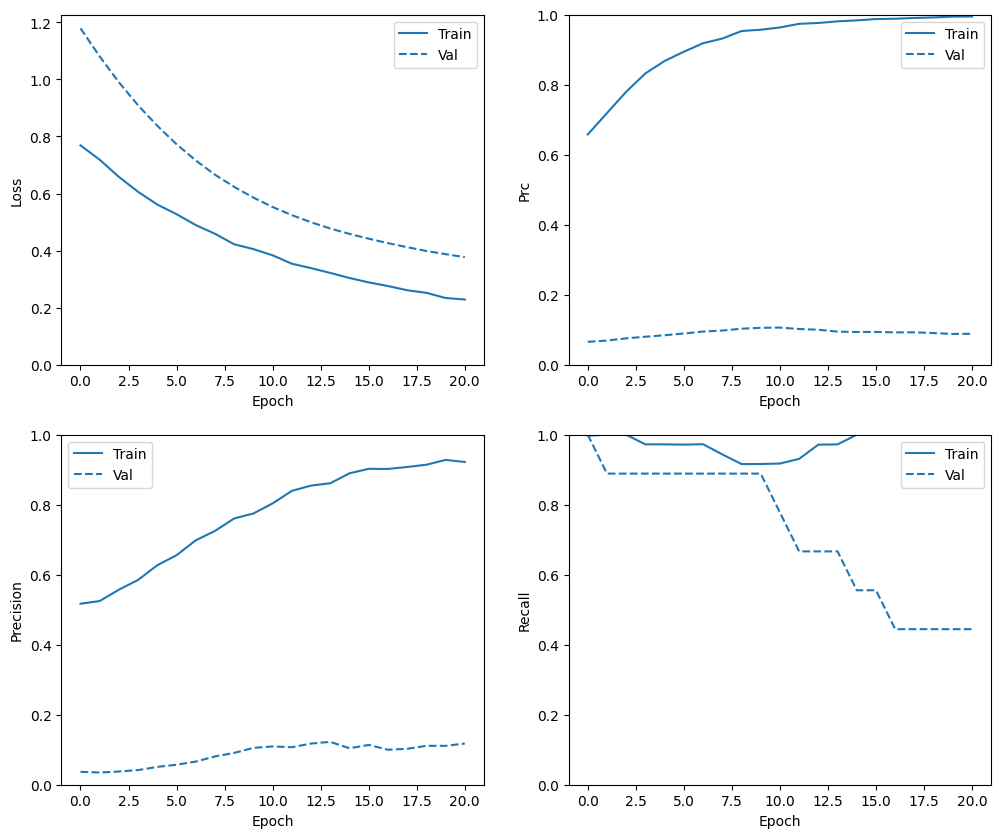

In [211]:
plot_metrics(resampled_history)


Re-train

Because training is easier on the balanced data, the above training procedure may overfit quickly.

So break up the epochs to give the tf.keras.callbacks.EarlyStopping finer control over when to stop training.

In [212]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1]
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 4s 109ms/step - loss: 0.5618 - cross entropy: 0.5606 - Brier score: 0.1908 - tp: 19774.0000 - fp: 11729.0000 - tn: 9041.0000 - fn: 688.0000 - accuracy: 0.6989 - precision: 0.6277 - recall: 0.9664 - auc: 0.8637 - prc: 0.8454 - val_loss: 0.5853 - val_cross entropy: 0.5853 - val_Brier score: 0.1956 - val_tp: 8.0000 - val_fp: 68.0000 - val_tn: 195.0000 - val_fn: 1.0000 - val_accuracy: 0.7463 - val_precision: 0.1053 - val_recall: 0.8889 - val_auc: 0.8357 - val_prc: 0.1051
Epoch 2/1000
20/20 [==============================] - 2s 99ms/step - loss: 0.3011 - cross entropy: 0.3011 - Brier score: 0.0820 - tp: 20019.0000 - fp: 2723.0000 - tn: 17790.0000 - fn: 428.0000 - accuracy: 0.9231 - precision: 0.8803 - recall: 0.9791 - auc: 0.9852 - prc: 0.9846 - val_loss: 0.3873 - val_cross entropy: 0.3873 - val_Brier score: 0.1157 - val_tp: 4.0000 - val_fp: 32.0000 - val_tn: 231.0000 - val_fn: 5.0000 - val_accuracy: 0.8640 - val_precision: 0.1111 - val_

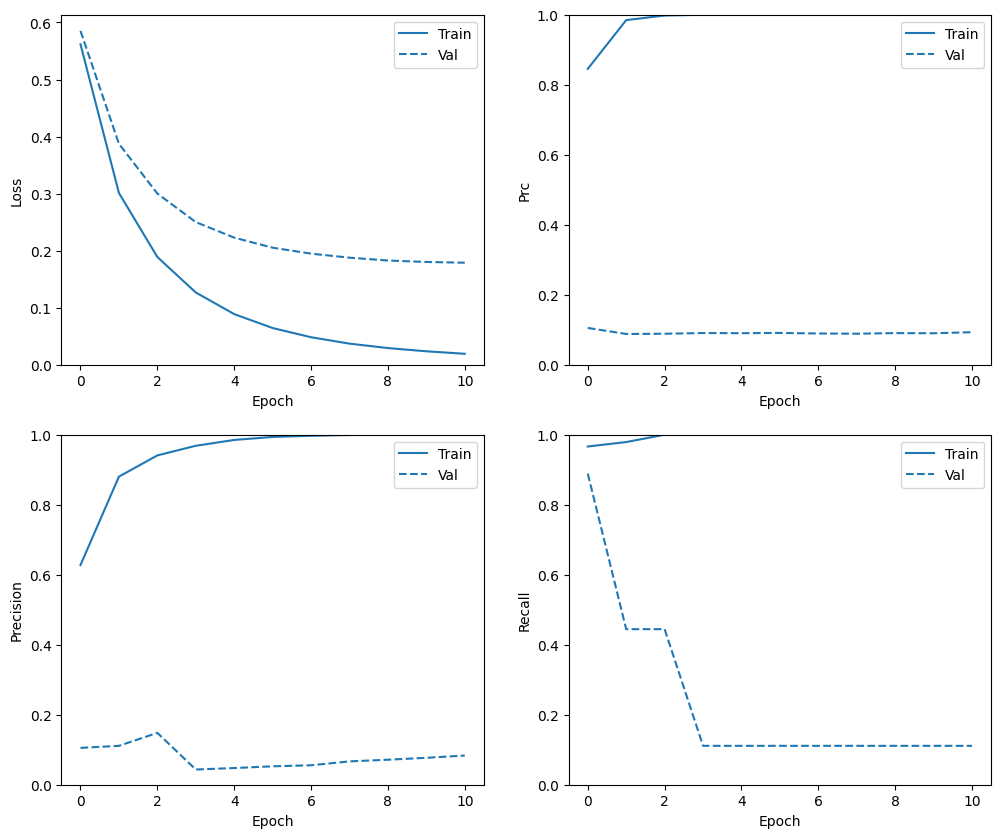

In [213]:
plot_metrics(resampled_history)

In [214]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

1/1 [==============================] - 0s 30ms/step


loss :  0.5643742084503174
cross entropy :  0.5643742084503174
Brier score :  0.1902637481689453
tp :  3.0
fp :  97.0
tn :  234.0
fn :  6.0
accuracy :  0.6970587968826294
precision :  0.029999999329447746
recall :  0.3333333432674408
auc :  0.6289023160934448
prc :  0.03507295995950699

patient no Myocardial rupture Detected (True Negatives):  234
patient no Myocardial rupture Incorrectly Detected (False Positives):  97
patient with Myocardial rupture Missed (False Negatives):  6
patient with Myocardial rupture Detected (True Positives):  3
patient with Myocardial rupture(TN+FN):  9
patient no Myocardial rupture Detected (True Negatives):  132
patient no Myocardial rupture Incorrectly Detected (False Positives):  199
patient with Myocardial rupture Missed (False Negatives):  1
patient with Myocardial rupture Detected (True Positives):  8
patient with Myocardial rupture(TN+FN):  9


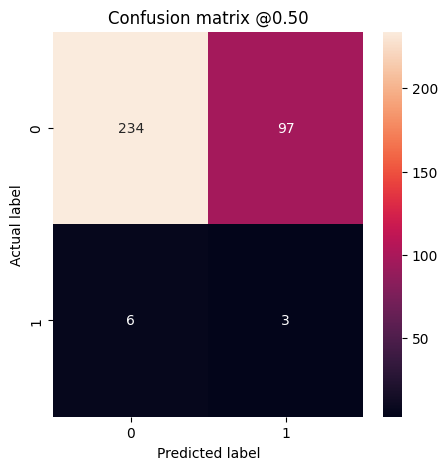

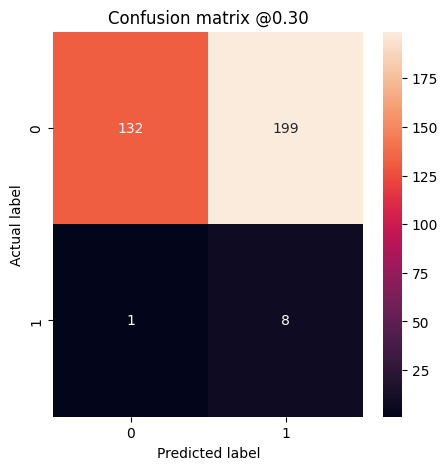

In [218]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()
plot_cm(test_labels, test_predictions_resampled)
plot_cm(test_labels, test_predictions_resampled,threshold=0.3)
#plot_cm(test_labels, test_predictions_weighted,threshold=0.2)

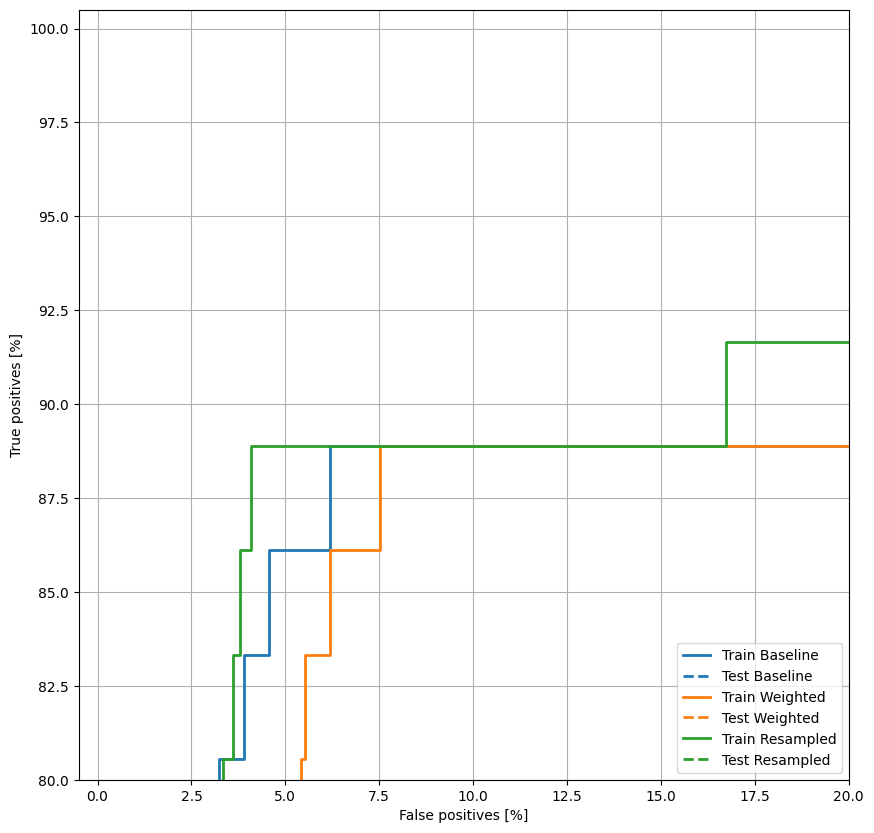

In [219]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')
plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');

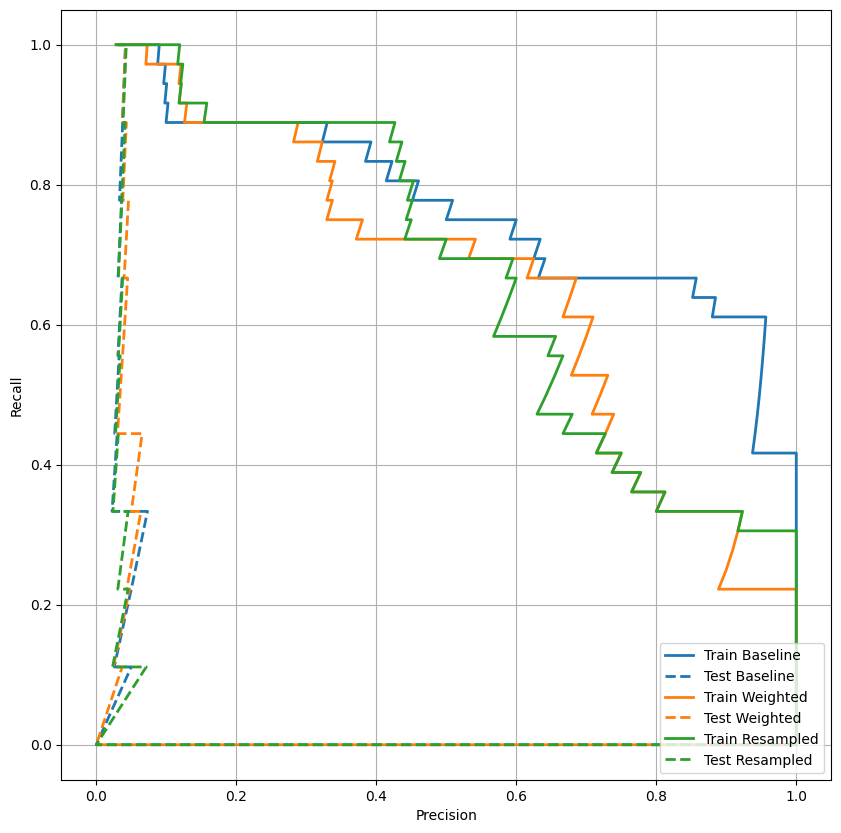

In [220]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_prc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_prc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');

We see some improvement model regonize true postive case, due to lack of positive case data and imbalanced dataset, its hard to  get  perfect model, in this project we deeply care TP so set up threholds to 0.01 would be the last model

let's check if some model like decision tree and random fores could get better result


because we had finish data process, we could train model with hyper parameter turning directly  

#XGBClassifier

In [227]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
    # Add more parameters here when necessary
}

smote = SMOTE(sampling_strategy=0.5)  # You can adjust the sampling_strategy as needed
X_train_smote, y_train_smote = smote.fit_resample(train_features, bool_train_labels)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Best estimator
best_xgb = grid_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(test_features)

# Evaluation
'''
#print("precision:\n", precision(y_test, y_pred))
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
test_cm = metrics.confusion_matrix(y_test, y_pred)
print("Test Confusion Matrix:\n", test_cm)
'''



Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

'\n#print("precision:\n", precision(y_test, y_pred))\nprint("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))\nprint(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")\nprint(f"F1 Score: {metrics.f1_score(y_test, y_pred)}")\nprint(f"Precision: {metrics.precision_score(y_test, y_pred)}")\ntest_cm = metrics.confusion_matrix(y_test, y_pred)\nprint("Test Confusion Matrix:\n", test_cm)\n'

patient no Myocardial rupture Detected (True Negatives):  328
patient no Myocardial rupture Incorrectly Detected (False Positives):  3
patient with Myocardial rupture Missed (False Negatives):  8
patient with Myocardial rupture Detected (True Positives):  1
patient with Myocardial rupture(TN+FN):  9


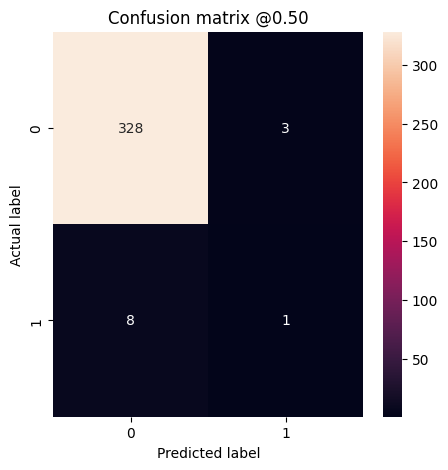

In [232]:
plot_cm(test_labels, y_pred)


#Ensemble Learning,

1/1 [==============================] - 0s 30ms/step
Accuracy: 0.4676470588235294
Precision: 0.0425531914893617
Recall: 0.8888888888888888
F1 Score: 0.08121827411167513
Accuracy for postive case: 0.08121827411167513
patient no Myocardial rupture Detected (True Negatives):  151
patient no Myocardial rupture Incorrectly Detected (False Positives):  180
patient with Myocardial rupture Missed (False Negatives):  1
patient with Myocardial rupture Detected (True Positives):  8
patient with Myocardial rupture(TN+FN):  9


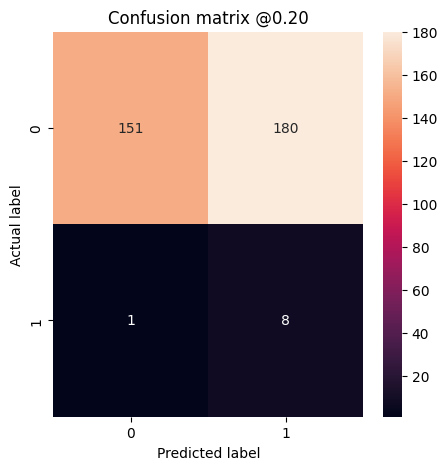

In [253]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV  # Import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier  # Import RandomForestClassifier

# Define base models
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = CalibratedClassifierCV(SVC(probability=True))  # Enable probability estimation for SVC
model4 = RandomForestClassifier()  # Add Random Forest as a base model

# Create a voting ensemble
ensemble = VotingClassifier(estimators=[
    ('dt', model1),
    ('lr', model2),
    ('svc', model3),
    ('rf', model4)  # Include Random Forest as a base model
], voting='soft')

# Train the ensemble on the training data
ensemble.fit(train_features, bool_train_labels)

# Make predictions on the test data (predict probabilities)
y_pred_probs = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

# Define a custom threshold (you can experiment with different values)
custom_threshold = 0.2  # Adjust the threshold as needed

# Apply the custom threshold to make binary predictions
y_pred = (y_pred_probs >= custom_threshold).astype(int)

# Evaluate the model with the adjusted threshold
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
plot_cm(test_labels, y_pred, threshold=custom_threshold)



#Optional:
Export model for download

In [ ]:
weighted_model.save('weighted_model.keras')


import joblib

# Save the ensemble model to a file
model_filename = 'ensemble_model.pkl'
joblib.dump(ensemble, model_filename)

We need to set the appropriate threshold to ensure that our output model makes sense in real world

#tensorflow tutorial reference:

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data